## simulation 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rate=0.5 # rate of arrival
mu=1.5 # waiting time


Sn=[] # Vector that store Sn which is the time arrival for nth car


TV=[] # Vector that store TV which is the interarrival time


for j in range(4900):
    T=[] # vector that store random exponential distribution for inter
    S=[]
    for i in range(2000):
        
        T.append(np.random.exponential(scale= 1/rate))
        S.append(sum(T))
    
    TV.append(T)
    Sn.append(S)  

## simulation 2

\begin{equation}
wait(n)=
    \begin{cases}
        S(n-1)+\mu+wait(n-1)-S(n) & \text{if } S(n-1)+\mu+wait(n-1)> S(n) \\
        0 &  else
    \end{cases}
\end{equation}



$exit(n)= wait(n)+S(n)+\mu$

and

$Q(n)=  \left\lceil \frac{wait(n)}{\mu} \right\rceil  $

In [2]:

waitV=[] # vector that hold wait time

for i in range(len(Sn)):

    wait=[]

    
    wait.append(0)
    for j in range(len(Sn[0])-1):        
        
        if Sn[i][j+1]<(Sn[i][j]+mu+wait[j]):
            wait.append(Sn[i][j]+mu-Sn[i][j+1]+wait[j])  # generate time according to the fomular above

        else:
            wait.append(0)

    waitV.append(wait)

In [3]:
exitV= np.array(waitV)+np.array(Sn)+1.5  # generating exit time for each vehicle

In [4]:
QV= np.ceil(np.array(waitV)/1.5) # generating car count for the quere

## simulation 3

In [ ]:
mQ= [np.mean(QV[i]) for i in range(len(QV))] # mean of length of step
stQ= [np.std(QV[i]) for i in range(len(QV))] # standard derivation of step length

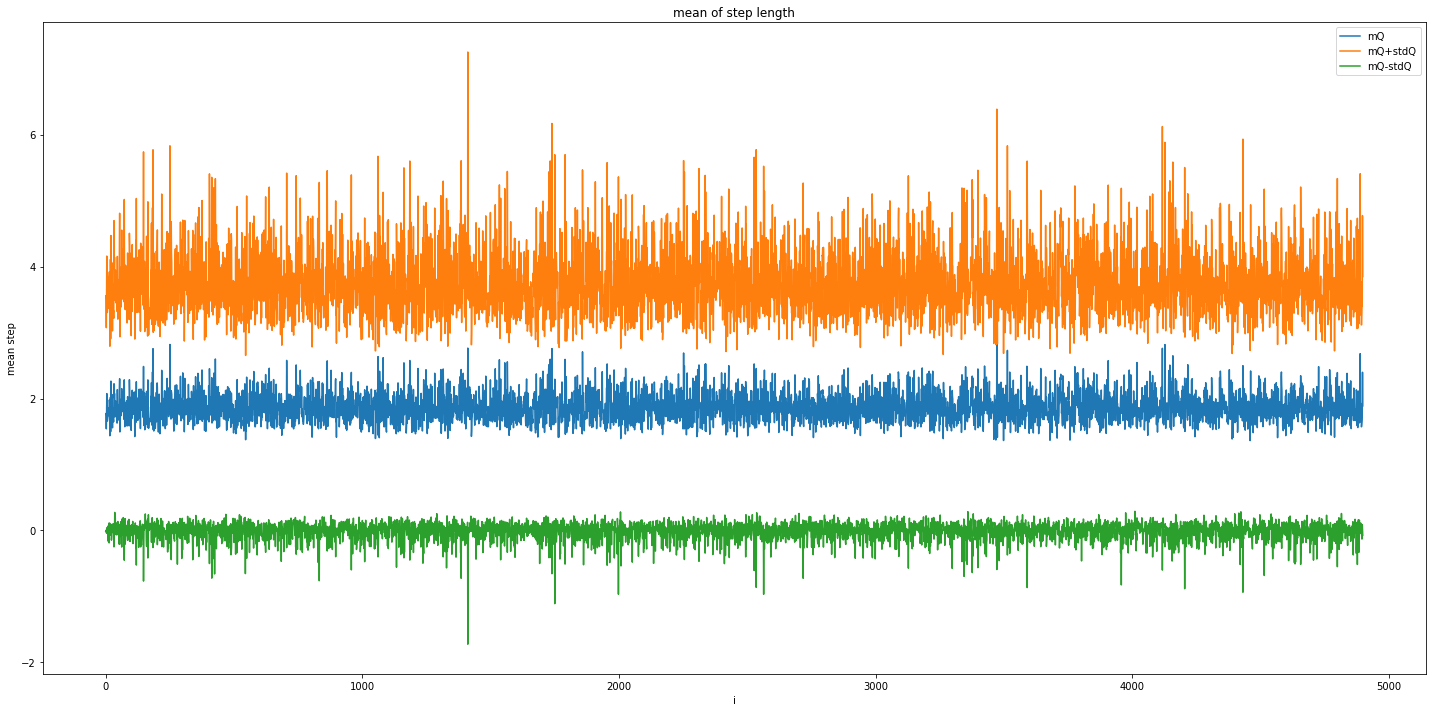

In [109]:
plt.figure(figsize=(20,10), tight_layout="tight")


plt.plot(range(len(QV)),mQ, label="mQ")
plt.plot(range(len(QV)), np.array(mQ)+np.array(stQ), label="mQ+stdQ")
plt.plot(range(len(QV)), np.array(mQ)-np.array(stQ), label="mQ-stdQ")
plt.title("mean of step length")
plt.xlabel("i")
plt.ylabel("mean step")
plt.legend()



## Simulation 4

In [110]:
mwaitV= [np.mean(waitV[i]) for i in range(len(waitV))]
stwaitV= [np.std(waitV[i]) for i in range(len(waitV))]


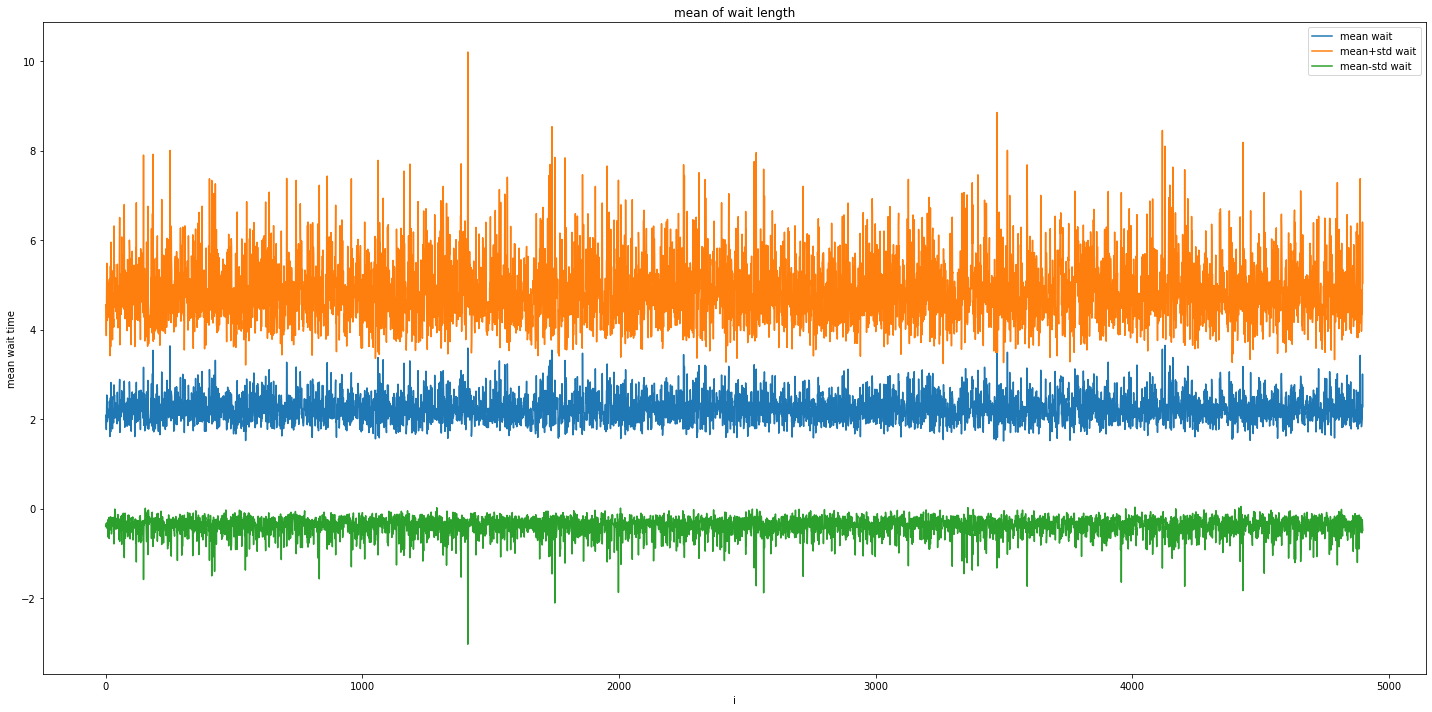

In [114]:
plt.figure(figsize=(20,10), tight_layout="tight")


plt.plot(range(len(waitV)),mwaitV, label= "mean wait")
plt.plot(range(len(waitV)), np.array(mwaitV)+np.array(stwaitV), label="mean+std wait")
plt.plot(range(len(waitV)), np.array(mwaitV)-np.array(stwaitV), label="mean-std wait")
plt.title("mean of wait length")
plt.xlabel("i")
plt.ylabel("mean wait time")
plt.legend()



## simulation 5

In [37]:
R=[np.corrcoef(QV[:,99],QV[:,99+i+5]) for i in 5*np.array(list(range(40)))]

R=[R[i][0][1] for i in range(len(R))]

Text(0.5, 0, 'time')

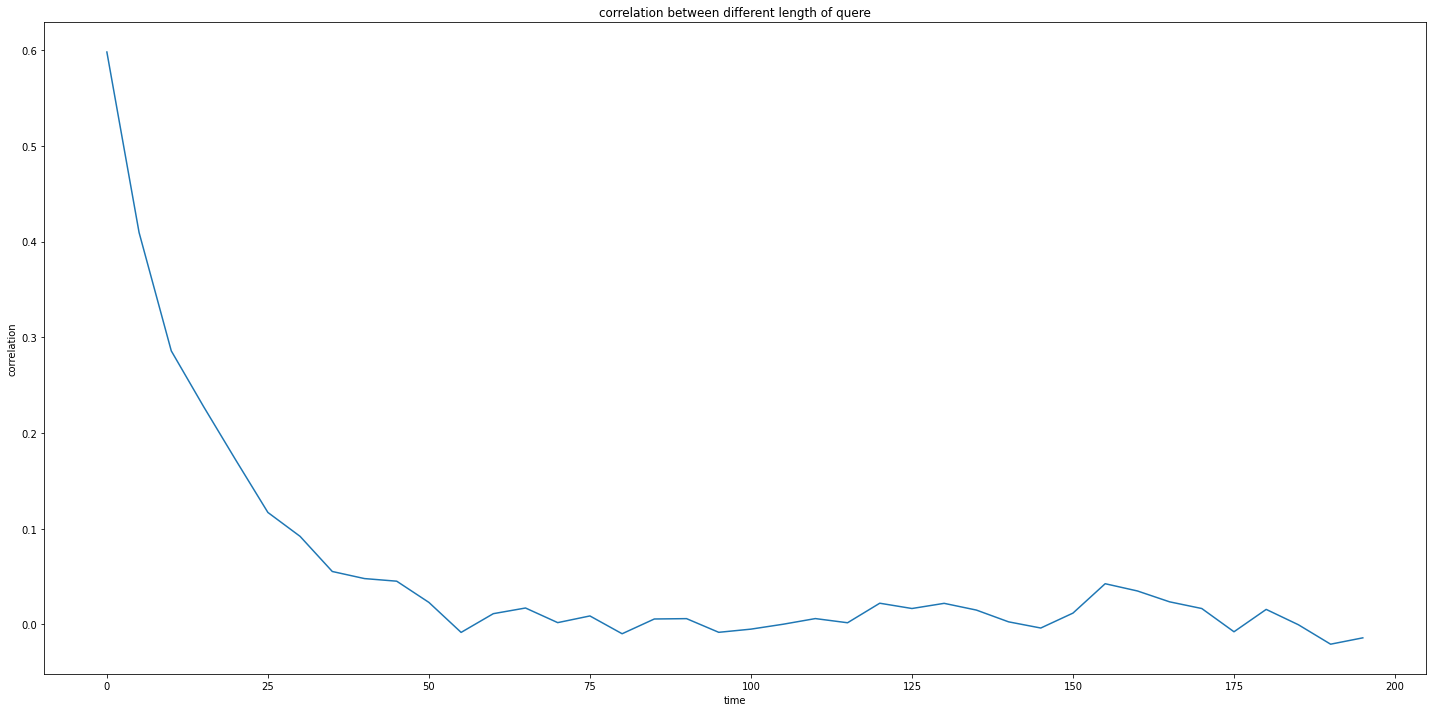

In [120]:
plt.figure(figsize=(20,10), tight_layout="tight")

plt.plot(5*np.array(list(range(40))), R)
plt.title("correlation between different length of quere")
plt.ylabel("correlation")
plt.xlabel("time")

## simulation 6

In [82]:
Bn= [exitV[:,i]-exitV[:,i-1] for i in range(len(exitV[0]))]

In [83]:
CorBn=[np.corrcoef(Bn[i],Bn[i+1]) for i in range(len(Bn)-1)]

CorBn=[CorBn[i][0][1] for i in range(len(CorBn))]

Text(0, 0.5, 'iteration')

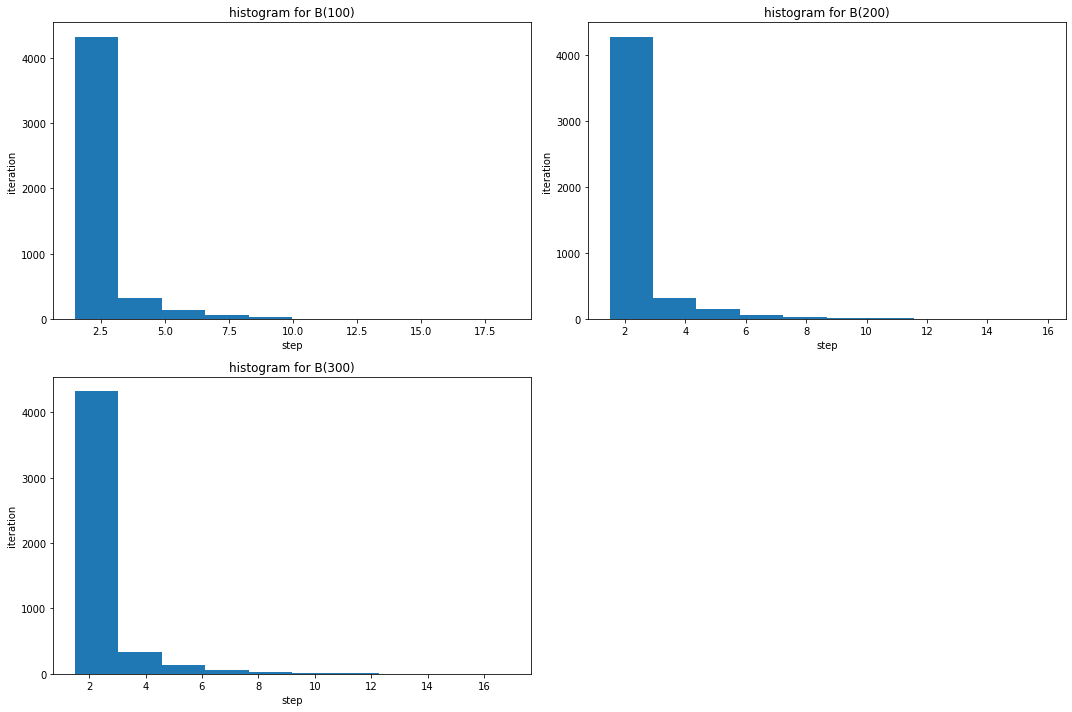

In [123]:
plt.figure(figsize=(15,10), tight_layout="tight")

plt.subplot(2,2,1)
plt.hist(Bn[100])
plt.title("histogram for B(100)")
plt.xlabel("step")
plt.ylabel("iteration")


plt.subplot(2,2,2)
plt.hist(Bn[200])
plt.title("histogram for B(200)")
plt.xlabel("step")
plt.ylabel("iteration")


plt.subplot(2,2,3)
plt.hist(Bn[300])
plt.title("histogram for B(300)")
plt.xlabel("step")
plt.ylabel("iteration")